In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Come, Let’s Explore Traffic Violation Data

**This is Python based Exploratory Data Analysis on traffic dataset to find out different trends in order to reduce traffic violations.**

## Libraries Used:
* Pandas
* Matplotlib
* Seaborn
* missingno


In [2]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
plt.rc('font', size = 11)
sns.set_style('darkgrid')

**About Dataset:**
This dataset contains around 65k+ traffic related violation records.
Attribute Information:
1. stop_date - Date of violation
2. stop_time - Time of violation
3. driver_gender - Gender of violators (Male-M, Female-F)
4. driver_age - Age of violators
5. driver_race - Race of violators
6. violation - Category of violation :
- Speeding
- Moving Violation (Reckless driving, Hit and run, Assaulting another driver, pedestrian, improper turns and lane changes etc)
- Equipment (Window tint violations, Headlight/taillights out, Loud exhaust, Cracked windshield, etc.)
- Registration/Plates
- Seat Belt
- other (Call for Service, Violation of City/Town Ordinance, Suspicious Person, Motorist Assist/Courtesy, etc.)
7. search_conducted - Whether search is conducted in True and False form
8. stop_outcome - Result of violation
9. is_arrested - Whether a person was arrested in True and False form
10. stop_duration - Detained time for violators approx (in minutes)
11. drugs_related_stop - Whether a person was involved in drugs crime (True, False)

## Data Loading:

In [5]:
df = pd.read_csv('/content/traffic_violaions.csv')
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22700 entries, 0 to 22699
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           22700 non-null  object 
 1   stop_time           22700 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       21574 non-null  object 
 4   driver_age_raw      21582 non-null  float64
 5   driver_age          21506 non-null  float64
 6   driver_race         21574 non-null  object 
 7   violation_raw       21574 non-null  object 
 8   violation           21574 non-null  object 
 9   search_conducted    22699 non-null  object 
 10  search_type         902 non-null    object 
 11  stop_outcome        21574 non-null  object 
 12  is_arrested         21574 non-null  object 
 13  stop_duration       21574 non-null  object 
 14  drugs_related_stop  22699 non-null  object 
dtypes: float64(3), object(12)
memory usage: 2.6+ MB


## Data Cleaning:

### Checking Missing Values in Dataset:

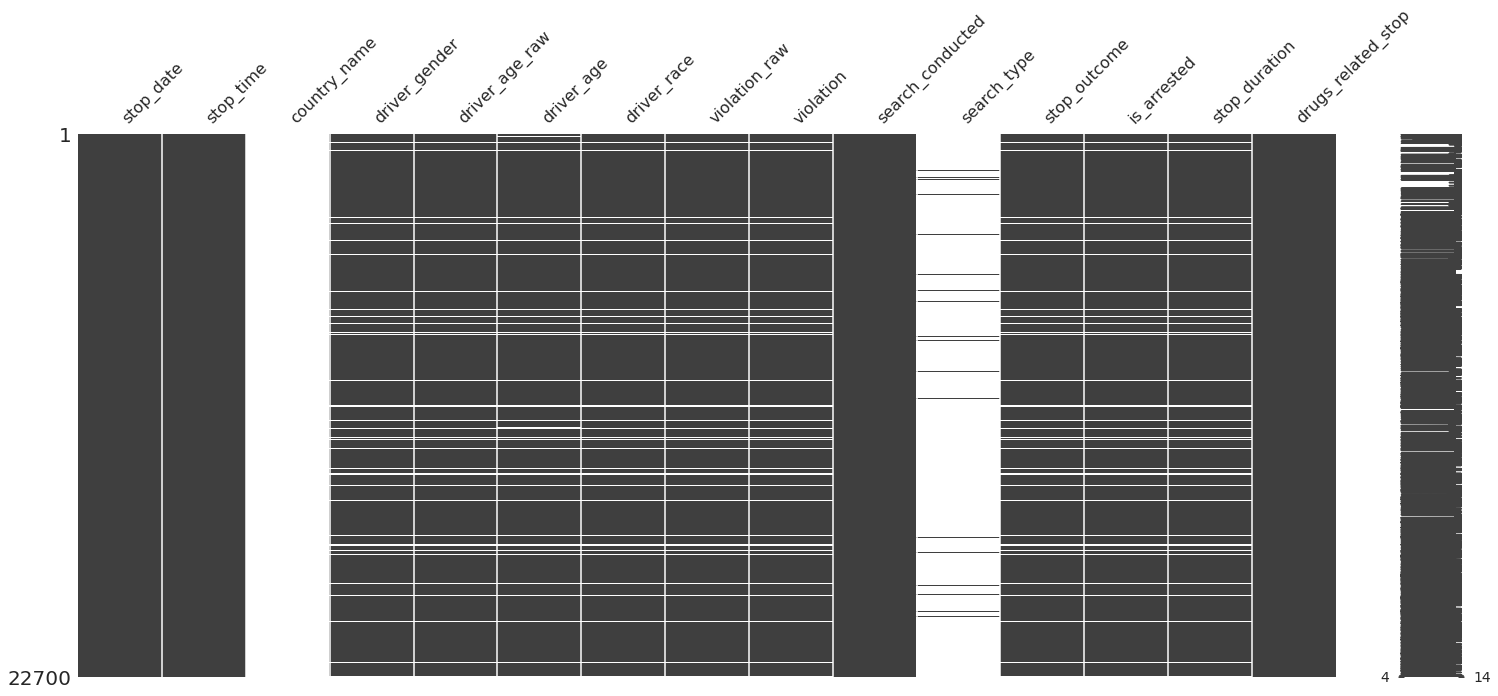

In [7]:
ms.matrix(df);

In [8]:
df1 = df.copy(deep=True)
df1.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
df1.dropna(subset = ['driver_gender'], inplace = True)

**1. As in the above graph, country_name and search_type columns contain almost all NaN values. we have to drop these two columns.**

**2. All other columns have almost similar patterns of missing values, we have to drop rows from these columns.**

In [9]:
df.isna().sum()

stop_date                 0
stop_time                 0
country_name          22700
driver_gender          1126
driver_age_raw         1118
driver_age             1194
driver_race            1126
violation_raw          1126
violation              1126
search_conducted          1
search_type           21798
stop_outcome           1126
is_arrested            1126
stop_duration          1126
drugs_related_stop        1
dtype: int64

**1. Some missing values are to remain in the driver_age column. We have to fill these missing values using median.**

**2. After cleaning, we again have to check the remaining missing values.**

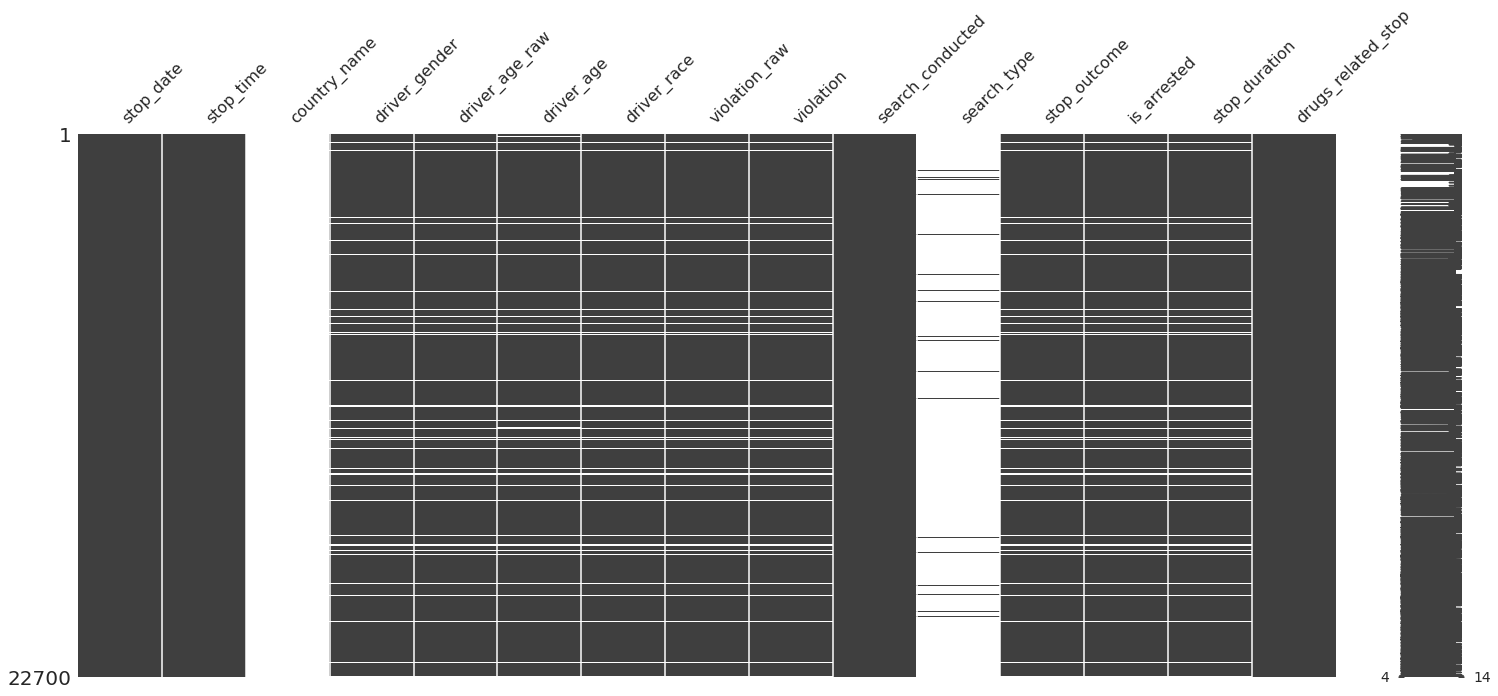

In [10]:
df2 = df1.copy(deep=True)
df2['driver_age'] = df2['driver_age'].fillna(df.groupby('driver_gender')['driver_age'].transform('median'))
ms.matrix(df);

**Now our dataset looks perfect for further analysis.**

## Data Manipulation:

In [11]:
data = df2.copy(deep=True)
pd.to_datetime(data['stop_time'])
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

data['stop_duration'].value_counts()
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()

data.search_conducted = data.search_conducted.replace(to_replace=[True, False], value=[1, 0])
data.drugs_related_stop = data.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])
data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year
yearly_data = data.groupby('stop_Year').sum()
yearly_data.reset_index(inplace = True)

search_conducted = len(data[data.search_conducted == True])
arrested_after_search = len(data[(data.search_conducted == True) & (data.is_arrested == True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

## Data Analysis:

#### let’s begin analysis of traffic violations and get some wonderful insights.

In [12]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0.0,Arrest Driver,True,23.0,0.0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,10,2005


 ### Age Distribution

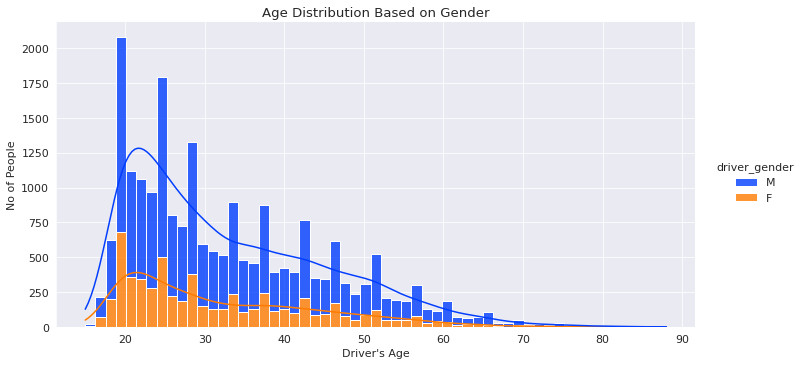

In [13]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

**We can observe it that both male and female drivers aged between 20 to 40 are doing maximum violations, while those above 16 are committing them minimally. It is also clear from the plot that the trend of violations and age group for one gender group follows that of other. This implies to the fact that the violations are independent of the gender of a person, obviously considering all other parameters constant.**

### Distribution in Violation Type

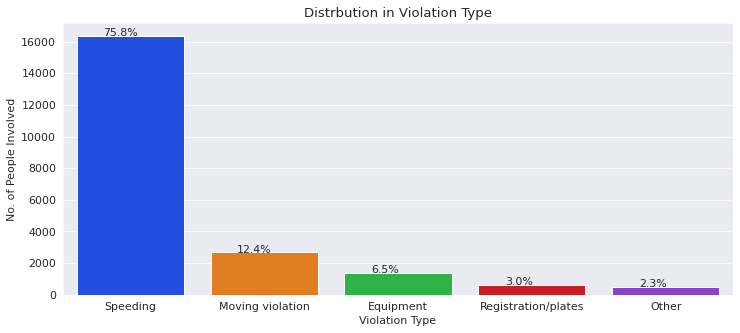

In [14]:
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = data.violation, data = data, order = data.violation.value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.violation))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved");

**Undoubtedly, the traffic violations, as per this dataset, occur the most because of speeding issues at a bar of 60.5% of all other reasons for violations.**

### Hours in Which Speed Violated

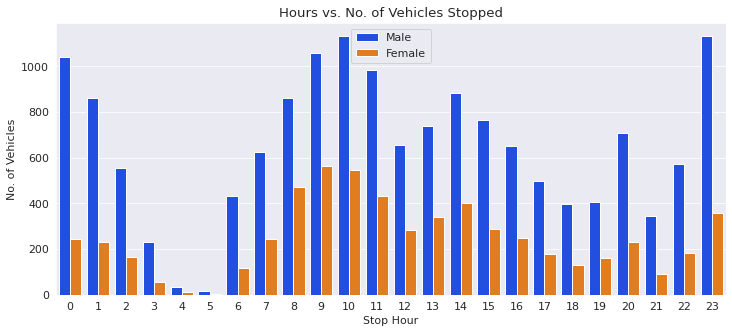

In [15]:
plt.figure(figsize = (12,5))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles");

**It is observable from the plot that for the most frequent reason of violations, i.e. ‘over- speeding’, most violations occur during 8:00 am and 4:00 pm, while it is being lower for after midnight and late evenings.**

### Hours in Which Vehicle Stopped

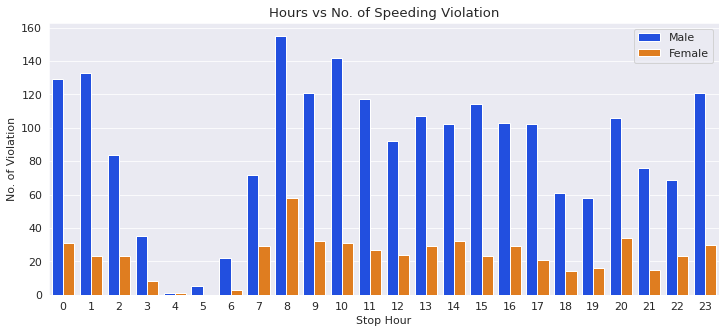

In [16]:
plt.figure(figsize = (12,5))
sns.countplot(x = data[data.violation == 'Moving violation'].stop_hour,data=data[data.violation == 'Moving violation'], 
              hue = 'driver_gender', palette = "bright")
plt.title('Hours vs No. of Speeding Violation')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Violation");

**It is quite obvious that people violate traffic rules for multiple reasons, be it hurry or urgency, inadequate driving skills, etc. So, for a loose analysis, considering only ‘hurry’ as a reason for violations, we can deduce forth written from this plot. It is also noteworthy that this assumption isn’t entirely irrational, because 60.5% of the violations occur because of over-speeding (refer second plot). Also, this plot is high in contrast to previous bar plot, pointing to the fact that most of the overall violations at almost every hour of a day are due to ‘over-speeding’. Hence, statistically, we are covering for most of the violators.
From 10:00 pm in the night, until 2:00 am, a high number of violations occur! An explanation for this might be people returning home or travelling to parties, celebrations, etc. Another important observation can be the highest of all (on an average) violations between 8:00 am to 3:00 pm. A possibility for this may be the conventional work hours of public during these hours, and that there may arise several situations in this case for ‘over- speeding’. One must also note the considerable dip in violations, particularly at 12:00 noon in this interval. Lastly, for all the hours in a day, females always have had far lesser violation cases than males. There can be many possibilities for this, a few of them being, there are lesser female drivers than male drivers, or the possibilities suggested above don’t follow with both genders, OR maybe ‘females’ are just ‘better drivers’!**

### Traffic Violation Distribution Based on Race

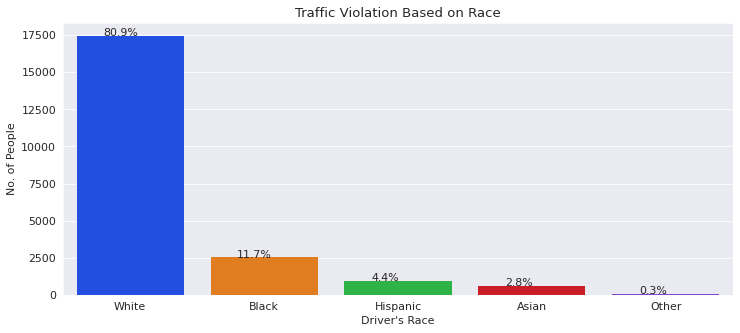

In [17]:
fig , ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.driver_race))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People");

**Segregating the total violations into the race of the violators, it is clear from this plot that the white, black and Hispanic contribute together to almost 97% of the total violations. Among these people with white race background violate the most with a participation of 74.4% of total. A very obvious reason for this may be the population distribution among a distinct race of people, i.e. since there are most white, any dataset is prone to have more observations for violations from this category. Although, it must be kept in mind that there can be multiple other reasons for this trend as well, and this is mere empirical judgement.**

### Age Group Involve in Drugs

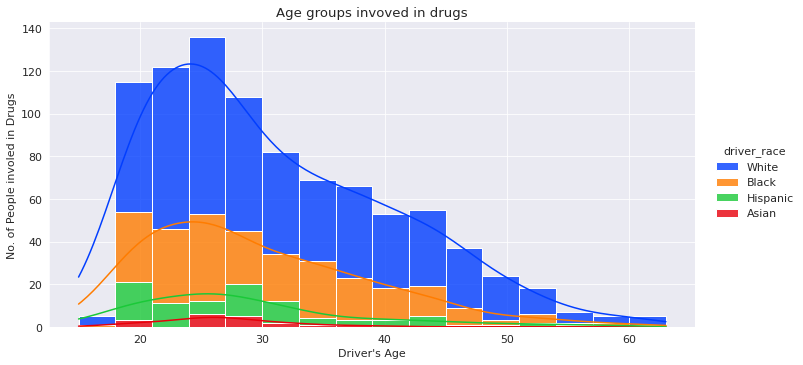

In [18]:
sns.displot(x='driver_age',data = data[data['is_arrested']==True],
            kde = True, hue = 'driver_race', multiple = "stack", alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age groups invoved in drugs')
plt.xlabel("Driver's Age")
plt.ylabel("No. of People involed in Drugs");

**People in their 20s, i.e. of age-group 20–30 are observed to be involved in drugs a lot more than those of any other age- group. This also explains the high number of violation records of this age group, as in first plot. This also gives weight to the fact that ‘drugs’ are an important element of the equation, and must be considered for traffic violation predictions.**

### Stop Duration Based on Race

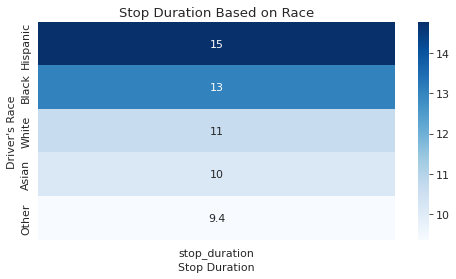

In [19]:
plt.figure(figsize = (8,4))
sns.heatmap(stop_duration_based_on_race.sort_values(by = ['stop_duration'], ascending=False), annot = True, cmap = "Blues");
plt.title("Stop Duration Based on Race")
plt.xlabel("Stop Duration")
plt.ylabel("Driver's Race");

**This mapping makes it quite obvious that people with Hispanic and/ or black race background are made to stop the most, for a potential violation case than any other race. Secondly, it is quite surprising that although white people have recorded to be violating traffic rules the most; they aren't stopped comparatively enough.**

### Correlation Heatmap

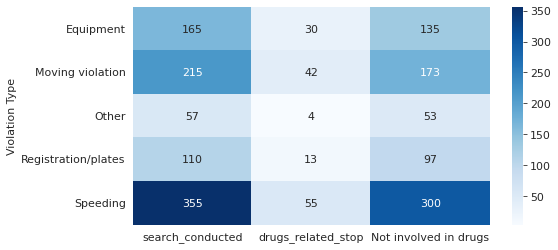

In [20]:
result = data.groupby('violation')[['search_conducted','drugs_related_stop','is_arrested']].sum()
result['Not involved in drugs'] = result['search_conducted']-result['drugs_related_stop']
plt.figure(figsize = (8,4))
sns.heatmap(result, annot = True, fmt = ".0f", cmap = "Blues");
plt.ylabel("Violation Type");

**This figure represents dependency of ‘drug- based’ cases with searches conducted for various types of violation types or reasons. As is followed in all the violation types, most of the total searches conducted do not turn out to be of people involved in drugs. Although a small proportion of them fall in ‘drug- involvement category’. It is interesting to note that this relation is independent of the type of traffic violation committed.**

### Total Search Conduct vs. Drug Related Stop

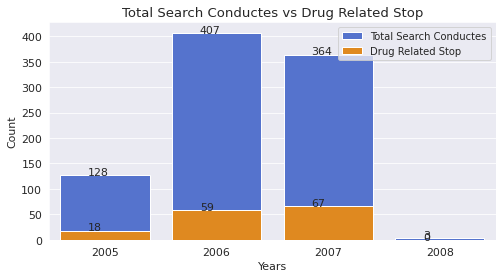

In [21]:
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.search_conducted,
            data = yearly_data,label = "Total Search Conductes", color = "royalblue")
sns.barplot(x = yearly_data.stop_Year, y = yearly_data.drugs_related_stop,
            data = yearly_data,label = "Drug Related Stop", color = "darkorange")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.55
    y = i.get_height()
    ax.annotate(count, (x, y))
ax.set_title("Total Search Conductes vs Drug Related Stop")
ax.set(xlabel = "Years", ylabel = "Count")
ax.legend(fontsize = '10');

**This bar plot also follows a similar trend to that of previous figure, except only the factorisation of total searches committed into time (yearly) in one and into violation type in the other.**

### Arrested vs. Not Arrested (Before and After Search Conduct)

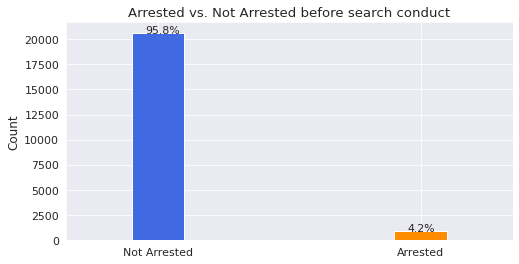

In [22]:
fig, ax = plt.subplots()
fig.canvas.draw()
data.is_arrested.value_counts().plot(kind="bar", width=0.2, figsize=(8, 4), color = ["royalblue","darkorange"])
plt.ylabel("Count", fontsize=12)
plt.title("Arrested vs. Not Arrested before search conduct")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(data.is_arrested))
    x = i.get_x() + i.get_width() - 0.15
    y = i.get_height()
    ax.annotate(percentage, (x, y))
ax.set_xticklabels(["Not Arrested","Arrested"], rotation = 0);

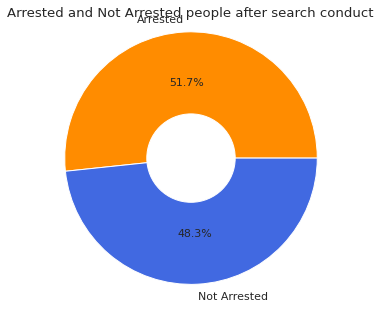

In [23]:
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([arrested, not_arrested], labels = ('Arrested','Not Arrested'),
       autopct = '%1.1f%%', colors = ["darkorange","royalblue"])
centre_circle = plt.Circle((0,0), 0.35, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Arrested and Not Arrested people after search conduct');
ax.axis('equal');

#Checking Racial Bias and shift effeciency# 
Now that we have done our exploratory data analysis, we shift now to the paramters that we want to derive from this dataset. 

The main goal of this is very clear, we wish to evaluate the following features: <br>
1. Is there a racial bias prevalent in the police department. 
2. If present, considering that police patrols are handled by three shifts: Those from 08:00 to 16:00, 16:00 to 00:00 and 00:00 to 08:00, is there then a racial bias in any one shift, which is being masked by another shift? 
<br> On which shift should I concentrate the efforts of an immediate training to remove this racial bias.
3. Are the workloads of all the shifts equal? Would rearranged shift timings be more effecient? 
4. Identify those shifts where the presence of trained medical professionals, who will be required for potential cases of drug over dose, are required. 
This would also be the cases where the DEA (Drug enforcement administration) will find it more fruitful to focus their efforts of nabbing people. 
5. Idenitfy the most deserving shift for an appraisal. This is found out by looking for a few desirable metrics which we shall come to later. 

##Before we begin let us once again take a look at our data: 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21574 entries, 0 to 22699
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   stop_date           21574 non-null  datetime64[ns]
 1   stop_time           21574 non-null  object        
 2   driver_gender       21574 non-null  object        
 3   driver_age          21574 non-null  float64       
 4   driver_race         21573 non-null  object        
 5   violation_raw       21573 non-null  object        
 6   violation           21573 non-null  object        
 7   search_conducted    21573 non-null  float64       
 8   stop_outcome        21573 non-null  object        
 9   is_arrested         21573 non-null  object        
 10  stop_duration       21573 non-null  float64       
 11  drugs_related_stop  21573 non-null  float64       
 12  stop_hour           21574 non-null  int64         
 13  stop_Year           21574 non-null  int64     

In [25]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0.0,Arrest Driver,True,23.0,0.0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0.0,Citation,False,7.5,0.0,10,2005


##Identifying if there is a racial bias prevalent in the police department. <br>
Identifying if there is a racial bias will consist of the following steps. 
1. Generate the desirable features which could help you achieve this. 
2. Aggregate these features for members of the same race and store it in another dataframe 
3. Apply a common metric to see how these features may differ from one race to another. 

##Feautres generation and agregation:  <br> 
1. counts: Number of times a person of a particular race was encountered 
2. search_conducted: Number of times a person of a particular race was searched
3. arrested: Number of times a person of a particular race was arrested 
4. arrested_without_searching: Number of times a person of a particular race was arrested without searching them first. 
5. arrested_after_stopTime: The mean time of the police stop after which a person of a particular race was arrested.
6. stopped_for: The mean stop time of a person belonging to a certain race. 
<br><br>
We will store these values in a global_performance dataframe. 

In [26]:
lists={}
searches=0
arrests=0
for index, row in data.iterrows():
    if(row["driver_race"] not in lists.keys()):
      lists[row["driver_race"]]= {"Race": row["driver_race"],
          "Counts" : 0,
          "search_conducted" : 0,
          "G_search_conducted": 0,
          "arrested" : 0,
          "G_arrests": 0,
          "arrested_after_searching" : 0, 
          "arrested_without_searching" : 0, 
          "arrested_after_stopTime" : 0 ,
          "stopped_for": 0
      }
    counts= lists[row["driver_race"]]

    counts["Counts"] += 1
    if(row["is_arrested"]==True):
        arrests+=1
        counts["arrested"] += 1
        if(row["search_conducted"]==True):
            counts["arrested_after_searching"] += 1
            counts["search_conducted"] += 1
            searches+=1
        else:
            counts["arrested_without_searching"] += 1
        counts["arrested_after_stopTime"] += row["stop_duration"]
    else:
        if(row["search_conducted"]==True):
            searches+=1
            counts["search_conducted"] += 1
    counts["stopped_for"] += row["stop_duration"]
    lists[row["driver_race"]]= counts

lists

{'White': {'Race': 'White',
  'Counts': 17445,
  'search_conducted': 545,
  'G_search_conducted': 0,
  'arrested': 560,
  'G_arrests': 0,
  'arrested_after_searching': 287,
  'arrested_without_searching': 273,
  'arrested_after_stopTime': 16976.5,
  'stopped_for': 186463.5},
 'Black': {'Race': 'Black',
  'Counts': 2526,
  'search_conducted': 256,
  'G_search_conducted': 0,
  'arrested': 250,
  'G_arrests': 0,
  'arrested_after_searching': 132,
  'arrested_without_searching': 118,
  'arrested_after_stopTime': 6821.5,
  'stopped_for': 33017.0},
 'Asian': {'Race': 'Asian',
  'Counts': 604,
  'search_conducted': 14,
  'G_search_conducted': 0,
  'arrested': 18,
  'G_arrests': 0,
  'arrested_after_searching': 10,
  'arrested_without_searching': 8,
  'arrested_after_stopTime': 477.5,
  'stopped_for': 6142.5},
 'Hispanic': {'Race': 'Hispanic',
  'Counts': 940,
  'search_conducted': 87,
  'G_search_conducted': 0,
  'arrested': 79,
  'G_arrests': 0,
  'arrested_after_searching': 37,
  'arrested_

In [27]:
for i in lists.keys():
  j=lists[i]
  if(j["Counts"]>0):
    j["search_conducted"]=j["search_conducted"]/j["Counts"]*100
    if(j["arrested"]>0):
      j["arrested_after_searching"] =(j["arrested_after_searching"]/j["arrested"])*100
      j["arrested_without_searching"] = (j["arrested_without_searching"]/j["arrested"])*100
      j["arrested_after_stopTime"] = j["arrested_after_stopTime"]/j["arrested"]
    j["stopped_for"]= j["stopped_for"]/j["Counts"]
    j["G_arrested"]=j["arrested"]/j["Counts"]*100
    j["arrested"]=j["arrested"]/j["Counts"]*100
    j["Counts"]=(j["Counts"]/21574)*100
  lists[i]=j
lists

{'White': {'Race': 'White',
  'Counts': 80.86122184110503,
  'search_conducted': 3.124104327887647,
  'G_search_conducted': 0,
  'arrested': 3.210088850673545,
  'G_arrests': 0,
  'arrested_after_searching': 51.24999999999999,
  'arrested_without_searching': 48.75,
  'arrested_after_stopTime': 30.31517857142857,
  'stopped_for': 10.688650042992261,
  'G_arrested': 3.210088850673545},
 'Black': {'Race': 'Black',
  'Counts': 11.708538055066283,
  'search_conducted': 10.134600158353127,
  'G_search_conducted': 0,
  'arrested': 9.897070467141726,
  'G_arrests': 0,
  'arrested_after_searching': 52.800000000000004,
  'arrested_without_searching': 47.199999999999996,
  'arrested_after_stopTime': 27.286,
  'stopped_for': 13.070863024544735,
  'G_arrested': 9.897070467141726},
 'Asian': {'Race': 'Asian',
  'Counts': 2.799666264948549,
  'search_conducted': 2.3178807947019866,
  'G_search_conducted': 0,
  'arrested': 2.980132450331126,
  'G_arrests': 0,
  'arrested_after_searching': 55.555555555